In [2]:
# Automatically reloads modules on code changes
# Note: Does NOT automatically reload on cofiguration file changes
%load_ext autoreload
%autoreload 2

CA_1


AttributeError: 'QuadMesh' object has no property 'cabr'

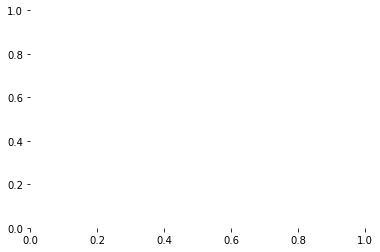

In [53]:
from src.preprocessing import preprocessor
from src.linear_regression_forecast import lr_forecast
from pathlib import Path
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

DATA_FOLDER = Path('../data/processed/')
STATES = ['CA', 'WI', 'TX']
STORES = [1, 2, 3, 4]

cat_cols = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'season']

for store in product(STATES, STORES):
    store_id = f'{store[0].upper()}_{store[1]}'
    print(store_id)
    store_data = DATA_FOLDER / Path(f'{store_id}_sales_data.csv')
    try:
        df = preprocessor.load_and_preprocess(store_data)
    except FileNotFoundError:
        pass
    corr = df.corr()
    sns.heatmap(df.corr(), xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cbar=False)
    trained_model = lr_forecast.split_train_and_plot(df, cat_cols)
    plt.title(store_id)